Creating Matches
----------------

One of the capabilities of the library is to create a match between two strategies. Strategies are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example let us create a 5 turns match between `Cooperator` and `Random`. 

`Cooperator` is a strategy designed to cooperate and each turn, and `Random` is a strategy that cooperates at teach turn with a probability of `0.5`.

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'4.3.0'

In [3]:
axl.seed(0)
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, turns=5)
results = match.play()
results

[(C, D), (C, D), (C, C), (C, C), (C, D)]

The first elemeent of each tuple is the action made by `Cooperator` and the second one by `Random`. Indeed we can see that `Cooperator` played C for all five turns.

`Random` is a stochastic strategy and its actions depend on a probability. We can see that the strategy cooperated only on the third and fourth turn.

The match between the two strategies is being seeded. That is because of the line `axl.seed(0)`. This means that no matter how many times you run the above match the results will remain the same.

`Random` is a stochastic strategy and thus the actions of the strategy can be different even for the same opponent! We can see this by running a match with a different seed.

In [4]:
axl.seed(1)
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, turns=5)
results = match.play()
results

[(C, C), (C, D), (C, D), (C, C), (C, C)]

Now `Random` also cooperated on the first turn. Try and change the seed and see other behaviours of the strategy.

There are several measures that can be obtained from a match. Let us consider the match between the strategies for `axl.seed(0)`

In [5]:
axl.seed(0)
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, turns=5)
results = match.play()

We can view the scores each strategy received at each turn. The first element of the tuples correspond to `Cooperator`.

In [6]:
scores = match.scores()
scores

[(0, 5), (0, 5), (3, 3), (3, 3), (0, 5)]

The final scores, which are the sum of the scores per turn.

In [7]:
match.final_score()

(6, 21)

The average score achieved per turn.

In [8]:
match.final_score_per_turn()

(1.2, 4.2)

The winner.

In [9]:
match.winner()

Random: 0.5

The number of cooperations.

In [10]:
match.cooperation()

(5, 2)

The normalised number of cooperations.

In [11]:
match.normalised_cooperation() 

(1.0, 0.4)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy plays against all opponents. The strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. 


**Reminder:** The full list of all the implemented strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

In [12]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [13]:
tournament = axl.Tournament(players=players)
tournament.turns # default value of turns

200

In [14]:
tournament.repetitions # default value of repetitions

10

In [15]:
axl.seed(1)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 121.02it/s]


Similar to the matches the tournaments include several result measures. For example the strategies ranked by their average score per turn.

In [16]:
winners = results.ranked_names

In [17]:
winners

['Defector',
 'Alternator',
 'Random: 0.5',
 'Tit For Tat',
 'Grumpy: Nice, 10, -10',
 'Cooperator']

The winner of the tournament is the strategies at index 0 which in our example is Defector.

In [18]:
winners[0]

'Defector'

The scores achieved by each strategy at each repetition.

In [19]:
scores = results.scores
scores

[[1803, 1812, 1752, 1791, 1761, 1800, 1791, 1788, 1821, 1812],
 [2668, 2612, 2680, 2608, 2612, 2672, 2656, 2668, 2628, 2660],
 [2616, 2589, 2070, 2606, 2409, 2119, 2605, 2137, 2300, 2218],
 [2360, 2353, 2352, 2346, 2355, 2364, 2353, 2339, 2346, 2368],
 [1989, 2013, 2208, 2001, 2056, 2174, 2007, 2167, 2112, 2172],
 [2638, 2661, 2655, 2647, 2692, 2671, 2655, 2672, 2635, 2643]]

In [20]:
for i, player in enumerate(players):
    print(f'{player.name}:', scores[i])
    print("========================================================================")
    

Cooperator: [1803, 1812, 1752, 1791, 1761, 1800, 1791, 1788, 1821, 1812]
Defector: [2668, 2612, 2680, 2608, 2612, 2672, 2656, 2668, 2628, 2660]
Random: [2616, 2589, 2070, 2606, 2409, 2119, 2605, 2137, 2300, 2218]
Tit For Tat: [2360, 2353, 2352, 2346, 2355, 2364, 2353, 2339, 2346, 2368]
Grumpy: [1989, 2013, 2208, 2001, 2056, 2174, 2007, 2167, 2112, 2172]
Alternator: [2638, 2661, 2655, 2647, 2692, 2671, 2655, 2672, 2635, 2643]


We can also plot the results.

In [21]:
%matplotlib inline

//anaconda3/envs/game-python/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


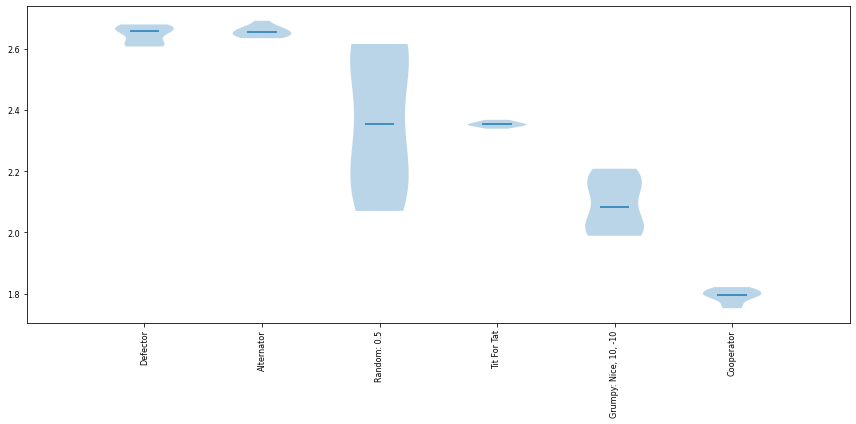

In [22]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show();

The above plot shows several things.

1. The ranks of the strategies. From left to right the strategies are ordered based on their performance. Defector is first and thus is the winner of the tournament. Cooperator is last and thus came last in the tournament.

2. The distributions of the average score each strategy achieved. Random has the more variation in its distribution and thus the strategy has many different scores each time the tournament was repeated. As a reminder the tournament was repeated 10 times.

EXERCISE
--------

Create your own tournament using any five players from the library and take a look at the ranked names and plot the scores.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at implementing our own strategies.